In [1]:
import math
import numpy as np
from datetime import datetime, timedelta, date
import time
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
temp = xr.load_dataset('/home/sgirtsou/Downloads/era5_temp/1990_2020_temp.nc')

In [3]:
temp_cell = temp.sel(latitude=slice(37.95,37.85), longitude=slice(23.85, 23.95))

In [4]:
temp_cell

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 136152)
Coordinates:
  * longitude  (longitude) float32 23.9
  * latitude   (latitude) float32 37.9
  * time       (time) datetime64[ns] 1990-04-01 ... 2020-09-30T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 285.0374 ... 291.70956
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-14 18:14:44 GMT by grib_to_netcdf-2.6.0: grib_to_ne...

In [5]:
def speedstats(dsspeed, percent=False):
    bins=list(range(0,int(dsspeed["t2m"].max())+2))
    sg = dsspeed.groupby_bins("t2m",bins)
    speedcounts = sg.count(...)["t2m"]
    speedlabelsdict={}
    for k in sg.groups:
        speedlabelsdict[k.left]=k
    speedlabels=[]    
    for k in sorted(speedlabelsdict):
        speedlabels.append("%s"%speedlabelsdict[k])
    if percent:
        alldscount = dsspeed["t2m"].count().item(0)
        speedcounts = speedcounts/alldscount
    return speedlabels, speedcounts

(array([  180.,  2892., 10619., 18467., 31989., 35302., 24165., 11182.,
         1269.,    87.]),
 array([ 2.1023865,  6.1883364, 10.274286 , 14.360235 , 18.446186 ,
        22.532135 , 26.618084 , 30.704035 , 34.789986 , 38.875935 ,
        42.961884 ], dtype=float32),
 <a list of 10 Patch objects>)

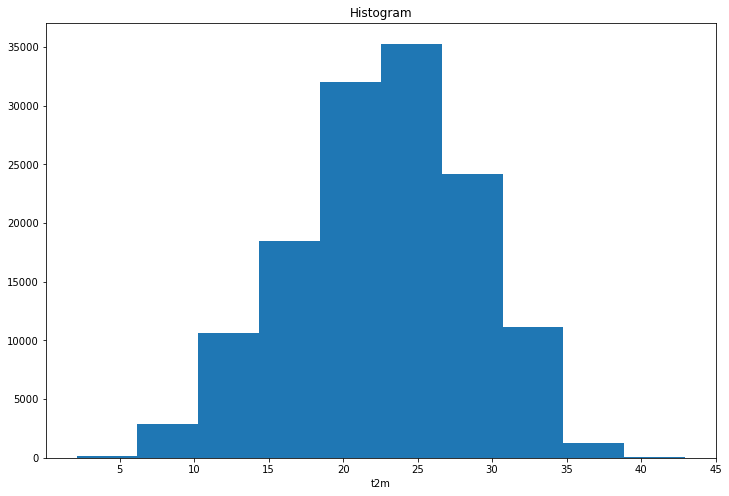

In [23]:
temp = temp_cell.t2m - 273.15
temp.plot.hist(figsize=(12,8))

In [20]:
temp = temp.squeeze('latitude')

In [17]:
list(range(0,int(dsspeed["speed"].max())+2))

AttributeError: 'DataArray' object has no attribute 't2m'

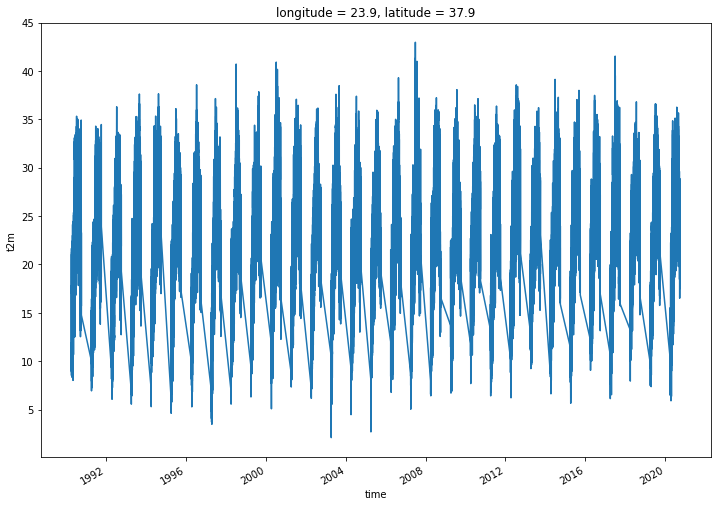

In [24]:
temp.plot(figsize=(12,8))